# Movie Performance

- Author: Bella Scribner
- FLEX Program
- Instructor: Morgan Jones

# Overview

Based on data from four different sources, this project explores what types of films have been successful.  The analysis shows which genres were the most popular and were the most profitable on average over the past twenty years.  Microsoft can utilize this information as a starting point in their new movie-making business venture. 

# The Situation

Microsoft would like some information concerning what kinds of movies are successful in consideration of creating a new movie studio venture where they create their own original content. In this analysis, we will focus on what genre(s) have been the most popular and have garnered the highest income on average over the past twenty years. Knowing what genres have been successful, will narrow down future research to be done -- such as what directors, writers, or actors to hire, what approximate budgets are required, and more.

# Previewing the Data

Data from four different movie tracking sources were provided for this project.  The sources are:
- [Box Office Mojo](https://www.boxofficemojo.com/)
- [IMDB](https://www.imdb.com/)
- [Rotten Tomatoes](https://www.rottentomatoes.com/)
- [TheMovieDatabase](https://www.themoviedb.org/)
- [The Numbers](https://www.the-numbers.com/)

## Box Office Mojo (BOM)

A single CSV file.

In [1]:
import pandas as pd

In [2]:
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The domestic gross income by movie would be a good measure of success.  Furthermore, the year released will be helpful as we do not want to complete analysis on outdata information.

## Internet Movie Database (IMDB)

This SQL database needed to be unzipped prior to utilizing. 

In [4]:
#import zipfile

#with zipfile.ZipFile('./zippedData/im.db.zip', 'r') as zip:
#    zip.extractall(path='./zippedData/')

In [5]:
import sqlite3
conn = sqlite3.connect('./zippedData/im.db')
cur = conn.cursor()

In [6]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [7]:
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

See the below given ERD for data set:

![IMDB_ERD_image](./images/movie_data_erd.jpeg)

After inspecting the ERD above for this database, we will move into further exploration of the movie_akas, movie_ratings, and movie_basics tables.  Potential analysis concerning the ratings as a measure of success across variables such as genre, director, and writer.

In [8]:
pd.read_sql("""
SELECT * 
FROM movie_basics
LIMIT 10;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [9]:
pd.read_sql("""
SELECT * 
FROM movie_akas
LIMIT 5;
""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [10]:
pd.read_sql("""
SELECT * 
FROM movie_ratings
LIMIT 5;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


While the table movie_akas will not be helpful in further analysis, the movie_basics and movie_ratings tables will be fabulous!  Can do potential analysis on average rating of movies based on director, writer, and genre grouping (genre grouping will need a bit of a deeper look). Furthermore, we can use the title or original_title data to maybe merge the genre (or director, or writer information) to another table that has data concerning the average income made by that grouping of movies.

## Rotten Tomatoes Data

There are two seperate tabular files from Rotten tomatoes: movie_info and reviews.

In [11]:
rt_movie_info_df = pd.read_csv('./zippedData/rt.movie_info.tsv.gz', delimiter="\t")
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [12]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [13]:
rt_reviews_df = pd.read_csv('./zippedData/rt.reviews.tsv.gz', delimiter="\t", encoding='latin-1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [14]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Based on preview, we could connect these two tables and compare average review ratings by genre, and/or movie rating (G, PG, R, etc).  The box_office data seems interesting, but maybe not worth pursuing with so many missing values.

## TheMovieDatabase (TMDB)

In [15]:
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


While the genre_ids information will not not be helpful without further investigation on how TheMovieDataBase transposes the descriptive genre name to the numbers shown, the popularity, vote_average, and vote_count columns could all be useful measures of success.  However, we will have to see how much data is relevant based on the release_data;  just from the preview we can see a movie released in 1995.  Movies released over 25 years ago fall outside of our limiting criteria for this analysis.

## The Numbers

In [17]:
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The budget column is very promising!  With this we could deduce net income for each entry -- always an important performance statistic to consider. 

# Prepping the Data for Analysis

Based on the previews above, we will skip over the data provided from Rotten Tomatoes due to the smaller sample size.  For this analysis we are going to focus on the performance of the most successful genres based on that rating, production budget, domestic gross income, and domestic net income.

Any movies released prior to 2003 will be dropped from the analysis.  Entries missing pertinent data will be dropped as well. Any joins, between data from different sources, that need to occur will be inner joins based on movie titles -- movie titles will be cleaned as best possible prior to the join.

The analysis we would like to pursue, and the data sources that need to be cleaned and prepped, are as follows:
 
1. Genre by Domestic Gross Income (IMDB and BOM)
2. Genre by Budget (IMDB and The Numbers)
3. Genre by Domestic Gross Income (IMDB and The Numbers)
4. Genre by Net Income (IMDB and The Numbers)
5. Genre by Rating (IMDB database only)
6. Genre by Popularity + Vote Average (IMDB and TMDB)

## Genre by Domestic Gross Income (IMDB and BOM)

First, we will check the BOM data to see if any entries need to be dropped based on the release date criteria. Then, seeing as the data will need to be merged based on the title names, will do some investigation on naming conventions for each table and some text cleaning if needed.

In [19]:
print(max(bom_df['year']))
print(min(bom_df['year']))

2018
2010


The year span of 2010-2018 is acceptable. No data needs to be dropped due to the release date, however the fact that no data from the past five years exists should be noted in the analysis later on.

Next, let's look at some naming conventions.  We saw from the BOM data preview that some of the entries have a note on the release data in the title -- such as `Alice in Wonderland (2010)`.  Let's check for parentheses in both the movie_basics table and bom_df.

In [20]:
bom_df.duplicated(keep=False).value_counts()

False    3387
dtype: int64

In [21]:
bom_df[bom_df['title'].str.contains("\(")]

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
10,Clash of the Titans (2010),WB,163200000.0,330000000,2010
55,A Nightmare on Elm Street (2010),WB (NL),63100000.0,52600000,2010
63,Aftershock (Tangshan Dadizhen),CL,63000.0,100200000,2010
79,If You Are the One 2 (Fei Cheng Wu Rao II),CL,427000.0,75600000,2010
...,...,...,...,...,...
3341,Unstoppable (2018),WGUSA,101000.0,NaN,2018
3365,The Apparition (2018),MBox,28300.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018


In [22]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE primary_title LIKE "%(%"
;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0756727,Who Is Harry Nilsson (And Why Is Everybody Tal...,Who Is Harry Nilsson (And Why Is Everybody Tal...,2010,116.0,"Biography,Documentary,Music"
1,tt0860907,Evangelion: 3.0 You Can (Not) Redo,Evangerion shin gekijôban: Kyu,2012,96.0,"Action,Animation,Drama"
2,tt10009978,Bigger Like Me (Extended Director's Cut),Bigger Like Me (Extended Director's Cut),2019,100.0,Documentary
3,tt10021804,Ne travaille pas (1968 - 2018),Ne travaille pas (1968 - 2018),2018,88.0,Documentary
4,tt10047768,Nikos Dragoumis: Enas zografos sti skia tis is...,Nikos Dragoumis: Enas zografos sti skia tis is...,2015,NaN,"Biography,Documentary"
...,...,...,...,...,...,...
726,tt9890106,Boy Meets Girl (Tholiprema Katha),Boy Meets Girl (Tholiprema Katha),2014,NaN,Romance
727,tt9894722,Tipi da spiaggia (la riviera romagnola),Tipi da spiaggia (la riviera romagnola),2018,NaN,Documentary
728,tt9900670,Waiting(Words Apart),Waiting(Words Apart),2019,NaN,Drama
729,tt9906128,Leak (Penangkeb),Leak (Penangkeb),2019,75.0,Horror


We can see that there is not a clear naming convention in either database when it comes to using the parentheses, which is unfortunate.

Let's also check for titles that contain colons.  Furthermore, let's see if movies with parts in their title, such as the Harry Potter movies, include colons or not and if it is consistent within a specific database, or between the two databases.

In [23]:
bom_df[bom_df['title'].str.contains(":")].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
2418,13 Hours: The Secret Soldiers of Benghazi,Par.,52900000.0,16600000,2016
3264,2001: A Space Odyssey (2018 re-release),WB,3200000.0,NaN,2018
3078,2:22,Magn.,400.0,NaN,2017
1501,300: Rise of An Empire,WB,106600000.0,231000000,2014
1103,4:44: Last Day on Earth,IFC,17800.0,NaN,2012
...,...,...,...,...,...
1482,X-Men: Days of Future Past,Fox,233900000.0,513900000,2014
345,X-Men: First Class,Fox,146400000.0,207200000,2011
2434,Yo-kai Watch: The Movie,Elev.,257000.0,47600000,2016
1216,Young Detective Dee: Rise of the Sea Dragon,WAMCR,87800.0,72200000,2013


In [24]:
pd.read_sql("""
SELECT primary_title, original_title, start_year
FROM movie_basics
WHERE primary_title LIKE "%:%"
;""", conn)

,primary_title,original_title,start_year
0,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013
1,Prague: The Restless Heart of Europe,Praha - neklidné srdce Evropy,2018
2,Quantum Quest: A Cassini Space Odyssey,Quantum Quest: A Cassini Space Odyssey,2010
3,Hempsters: Plant the Seed,Hempsters: Plant the Seed,2010
4,Caleuche: El llamado del Mar,Caleuche: El llamado del Mar,2012
...,...,...,...
16163,Footloose in Italy IV: 4 Rimini Tuscany Rome,Footloose in Italy IV: 4 Rimini Tuscany Rome,2016
16164,Footloose in London II: 2 Undiscovered and Unu...,Footloose in London II: 2 Undiscovered and Unu...,2018
16165,"The Good Americans: One Revolution, Two Nations","The Good Americans: One Revolution, Two Nations",2019
16166,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013


In [25]:
bom_df[bom_df['title'].str.contains(": Part")]

,title,studio,domestic_gross,foreign_gross,year
851,Katy Perry: Part of Me,Par.,25300000.0,7400000,2012
2138,Attack on Titan: Part 1,FUN,450000.0,NaN,2015
2156,Attack on Titan: Part 2,FUN,306000.0,NaN,2015


In [26]:
pd.read_sql("""
SELECT primary_title, original_title, start_year
FROM movie_basics
WHERE primary_title LIKE "%: Part%"
;""", conn)

,primary_title,original_title,start_year
0,Atlas Shrugged: Part I,Atlas Shrugged: Part I,2011
1,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010
2,El Encanto de la Oscuridad: Parte 2,El Encanto de la Oscuridad: Parte 2,2018
3,Bhoot: Part One - The Haunted Ship,Bhoot: Part One - The Haunted Ship,2019
4,Harry Potter and the Deathly Hallows: Part 2,Harry Potter and the Deathly Hallows: Part 2,2011
...,...,...,...
88,The Laws of the Universe: Part I,Uchu no Ho: Reimei-hen,2018
89,The Morning After: Part One,The Morning After: Part One,2018
90,The Art of Mandolin in Crete: part 2,The Art of Mandolin in Crete: part 2,2018
91,Arwah Tumbal Nyai: part Nyai,Arwah Tumbal Nyai: part Nyai,2018


In [27]:
bom_df[bom_df['title'].str.contains("Part")]

,title,studio,domestic_gross,foreign_gross,year
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
331,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000,2011
335,The Hangover Part II,WB,254500000.0,332300000,2011
606,Chillar Party,UTV,6300.0,826000,2011
732,The Twilight Saga: Breaking Dawn Part 2,LG/S,292300000.0,537400000,2012
851,Katy Perry: Part of Me,Par.,25300000.0,7400000,2012
1145,The Hangover Part III,WB,112200000.0,249800000,2013
1280,The Last Exorcism Part II,CBS,15200000.0,NaN,2013
1481,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,418200000,2014


As we can see there does not seem to be a clear naming convention even within a specific table.  We will have to simply strip the leading and extending whitespace of the titles, merge the two tables on this title, and hope that we do not lose too much data.  With increased technical know-how, there would be a more sophisticated way to clean, search for, and join similar text strings which would increase the amount of data kept and lead to more reliable results.

Let's also check what date range of release years the movie_basics table includes.

In [28]:
q = """
SELECT start_year, COUNT(*)
FROM movie_basics
GROUP BY start_year
"""
pd.read_sql(q, conn)

,start_year,COUNT(*)
0,2010,11849
1,2011,12900
2,2012,13787
3,2013,14709
4,2014,15589
5,2015,16243
6,2016,17272
7,2017,17504
8,2018,16849
9,2019,8379


As we can see above, there are some incorrect entries in the data seeing as years 2024 and above have not occured yet. Luckily there are no movie entries released prior to 2010 which falls within our limiting criteria of the past 20 years. 

In [29]:
query = """
SELECT primary_title as title, movie_id, start_year as year, genres
FROM movie_basics
WHERE year < 2024
"""
movie_basics_df = pd.read_sql(query, conn)
movie_basics_df.head()

,title,movie_id,year,genres
0,Sunghursh,tt0063540,2013,"Action,Crime,Drama"
1,One Day Before the Rainy Season,tt0066787,2019,"Biography,Drama"
2,The Other Side of the Wind,tt0069049,2018,Drama
3,Sabse Bada Sukh,tt0069204,2018,"Comedy,Drama"
4,The Wandering Soap Opera,tt0100275,2017,"Comedy,Drama,Fantasy"


In [30]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146138 entries, 0 to 146137
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     146138 non-null  object
 1   movie_id  146138 non-null  object
 2   year      146138 non-null  int64 
 3   genres    140731 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [31]:
movie_basics_df.duplicated(keep=False).value_counts()

False    146138
dtype: int64

In [32]:
movie_basics_df['titleClean'] = movie_basics_df['title'].str.strip()

In [33]:
bom_df['titleClean'] = bom_df['title'].str.strip()

In [34]:
bom_df

,title,studio,domestic_gross,foreign_gross,year,titleClean
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,Alice in Wonderland (2010)
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows Part 1
3,Inception,WB,292600000.0,535700000,2010,Inception
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,The Quake
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,Edward II (2018 re-release)
3384,El Pacto,Sony,2500.0,NaN,2018,El Pacto
3385,The Swan,Synergetic,2400.0,NaN,2018,The Swan


In [35]:
IMDB_and_BOM_df = bom_df.merge(movie_basics_df, on=["titleClean", "year"], how='inner')
IMDB_and_BOM_df.head()

,title_x,studio,domestic_gross,foreign_gross,year,titleClean,title_y,movie_id,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,Toy Story 3,tt0435761,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,Inception,Inception,tt1375666,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,Shrek Forever After,tt0892791,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,tt1325004,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,Iron Man 2,tt1228705,"Action,Adventure,Sci-Fi"


In [36]:
IMDB_and_BOM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 0 to 1872
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_x         1873 non-null   object 
 1   studio          1871 non-null   object 
 2   domestic_gross  1863 non-null   float64
 3   foreign_gross   1278 non-null   object 
 4   year            1873 non-null   int64  
 5   titleClean      1873 non-null   object 
 6   title_y         1873 non-null   object 
 7   movie_id        1873 non-null   object 
 8   genres          1871 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 146.3+ KB


**Wonderful!** Now we can group by genre and use that for analysis with domestic gross income (dropping entries that do not include this information).

In [37]:
IMDB_and_BOM_df.drop(IMDB_and_BOM_df.loc[:,('studio','foreign_gross', 'year')], axis=1, inplace=True)

In [38]:
IMDB_and_BOM_df.dropna(inplace=True)

In [39]:
grouped = IMDB_and_BOM_df.groupby('genres').mean().sort_values(by=['domestic_gross'], ascending=False)
top_ten_gross_BOM = grouped.head(10)
top_ten_gross_BOM

,domestic_gross
genres,
"Action,Adventure,Sci-Fi",2.437244e+08
"Adventure,Drama,Sci-Fi",2.082000e+08
"Adventure,Fantasy",1.929000e+08
"Biography,Drama,Musical",1.743000e+08
"Action,Adventure,Fantasy",1.530602e+08
"Action,Adventure,Mystery",1.509000e+08
"Animation,Comedy,Family",1.458669e+08
"Comedy,Music",1.446000e+08
"Adventure,Animation,Comedy",1.413663e+08


In [40]:
top_ten_gross_BOM.reset_index(inplace=True)
top_ten_gross_BOM

,genres,domestic_gross
0,"Action,Adventure,Sci-Fi",2.437244e+08
1,"Adventure,Drama,Sci-Fi",2.082000e+08
2,"Adventure,Fantasy",1.929000e+08
3,"Biography,Drama,Musical",1.743000e+08
4,"Action,Adventure,Fantasy",1.530602e+08
5,"Action,Adventure,Mystery",1.509000e+08
6,"Animation,Comedy,Family",1.458669e+08
7,"Comedy,Music",1.446000e+08
8,"Adventure,Animation,Comedy",1.413663e+08
9,"Action,Drama,Family",1.310500e+08


Nice!  Now we have the top ten genres by average domestic gross income.  We will use this data frame for our analysis later.

## Genre by Budget (IMDB and The Numbers)

We will continue to utilize the `movie_basics_df` created in the previous section for subsequent joins.  Below, we will review the two dataframes we are planning on merging (`movie_basics_df` and `tn_df` from TheNumbers source) and see if any further data cleaning needs to be accomplished prior to and after said merge. 

In [41]:
movie_basics_df.head()

,title,movie_id,year,genres,titleClean
0,Sunghursh,tt0063540,2013,"Action,Crime,Drama",Sunghursh
1,One Day Before the Rainy Season,tt0066787,2019,"Biography,Drama",One Day Before the Rainy Season
2,The Other Side of the Wind,tt0069049,2018,Drama,The Other Side of the Wind
3,Sabse Bada Sukh,tt0069204,2018,"Comedy,Drama",Sabse Bada Sukh
4,The Wandering Soap Opera,tt0100275,2017,"Comedy,Drama,Fantasy",The Wandering Soap Opera


In [42]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [43]:
tn_df.duplicated(keep=False).value_counts()

False    5782
dtype: int64

In [44]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the review, we can see that the data included in the `production_budget` and `domestic_gross` columns need to be transposed into integers prior to analysis. Furthermore, the date needs to be either transposed, or a new column with just the release year as an integer needs to be created so we can apply the limiting criteria to the data set.

In [45]:
tn_df['production_budget_int'] = tn_df['production_budget'].map(lambda x: int(x[1:].replace(',','')))

In [46]:
tn_df['domestic_gross_int'] = tn_df['domestic_gross'].map(lambda x: int(x[1:].replace(',','')))

In [47]:
tn_df['year'] = tn_df['release_date'].map(lambda x: int(x[-4:]))

In [48]:
min(tn_df['year'])

1915

In [49]:
max(tn_df['year'])

2020

We will drop all entries that have a release date prior to 2003.  It is good to see that The Numbers data includes more recent movie entries than information provided by BOM, based on the most recent release date year of 2020 rather than 2018.

In [50]:
tn_df = tn_df[tn_df['year'] >= 2003]
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     3807 non-null   int64 
 1   release_date           3807 non-null   object
 2   movie                  3807 non-null   object
 3   production_budget      3807 non-null   object
 4   domestic_gross         3807 non-null   object
 5   worldwide_gross        3807 non-null   object
 6   production_budget_int  3807 non-null   int64 
 7   domestic_gross_int     3807 non-null   int64 
 8   year                   3807 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 297.4+ KB


In [51]:
tn_df['titleClean'] = tn_df['movie'].map(lambda x: x.strip())

In [52]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_int,domestic_gross_int,year,titleClean
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2009,Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,2011,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,2019,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,2015,Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,2017,Star Wars Ep. VIII: The Last Jedi


In [53]:
IMDB_and_theNums_df = tn_df.merge(movie_basics_df, on=["titleClean", "year"], how='inner')
IMDB_and_theNums_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_int,domestic_gross_int,year,titleClean,title,movie_id,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,2011,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,tt1298650,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,2019,Dark Phoenix,Dark Phoenix,tt6565702,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,2015,Avengers: Age of Ultron,Avengers: Age of Ultron,tt2395427,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,678815482,2018,Avengers: Infinity War,Avengers: Infinity War,tt4154756,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000,229024295,2017,Justice League,Justice League,tt0974015,"Action,Adventure,Fantasy"


In [54]:
IMDB_and_theNums_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1547 non-null   int64 
 1   release_date           1547 non-null   object
 2   movie                  1547 non-null   object
 3   production_budget      1547 non-null   object
 4   domestic_gross         1547 non-null   object
 5   worldwide_gross        1547 non-null   object
 6   production_budget_int  1547 non-null   int64 
 7   domestic_gross_int     1547 non-null   int64 
 8   year                   1547 non-null   int64 
 9   titleClean             1547 non-null   object
 10  title                  1547 non-null   object
 11  movie_id               1547 non-null   object
 12  genres                 1541 non-null   object
dtypes: int64(4), object(9)
memory usage: 169.2+ KB


In [55]:
grouped = IMDB_and_theNums_df.groupby('genres').mean()
top_ten_budget_theNums = grouped.sort_values(by=['production_budget_int'], ascending=False).head(10)
top_ten_budget_theNums

,id,production_budget_int,domestic_gross_int,year
genres,,,,
"Adventure,Fantasy",36.333333,2.316667e+08,1.928914e+08,2013.333333
"Fantasy,Musical",51.000000,2.000000e+08,3.341911e+08,2010.000000
"Action,Sci-Fi",95.000000,1.780000e+08,1.002063e+08,2014.000000
"Action,Adventure,Sci-Fi",46.673077,1.731615e+08,2.409982e+08,2014.519231
"Family,Fantasy,Musical",35.000000,1.600000e+08,5.040142e+08,2017.000000
"Action,Adventure,Fantasy",53.612903,1.498581e+08,1.296164e+08,2015.032258
"Adventure,Family,Fantasy",41.928571,1.491714e+08,1.378265e+08,2014.428571
"Adventure,Drama,Sci-Fi",39.000000,1.365000e+08,2.082258e+08,2014.500000
"Action,Adventure,Animation",43.000000,1.279333e+08,1.755641e+08,2013.733333


In [56]:
top_ten_budget_theNums.reset_index(inplace=True)
top_ten_budget_theNums.drop(top_ten_budget_theNums.loc[:,('id', 'domestic_gross_int', 'year')], axis=1, inplace=True)

In [57]:
top_ten_budget_theNums

,genres,production_budget_int
0,"Adventure,Fantasy",2.316667e+08
1,"Fantasy,Musical",2.000000e+08
2,"Action,Sci-Fi",1.780000e+08
3,"Action,Adventure,Sci-Fi",1.731615e+08
4,"Family,Fantasy,Musical",1.600000e+08
5,"Action,Adventure,Fantasy",1.498581e+08
6,"Adventure,Family,Fantasy",1.491714e+08
7,"Adventure,Drama,Sci-Fi",1.365000e+08
8,"Action,Adventure,Animation",1.279333e+08
9,"Adventure,Mystery,Sci-Fi",1.250000e+08


Great! Now we have the top ten genres that had the largest average production budgets.

## Genre by Domestic Gross Income (IMDB and The Numbers)

Luckily most of the work in cleaning data from both IMDB and The Numbers has already been done, so we will just take the cleaned, joined data frame and widdle down the pertinent information for analysis on domestic gross income rather than production budget.

In [58]:
top_ten_gross_theNums = grouped.sort_values(by=['domestic_gross_int'], ascending=False).head(10)
top_ten_gross_theNums

,id,production_budget_int,domestic_gross_int,year
genres,,,,
"Family,Fantasy,Musical",35.000000,1.600000e+08,5.040142e+08,2017.000000
"Fantasy,Musical",51.000000,2.000000e+08,3.341911e+08,2010.000000
"Action,Adventure,Sci-Fi",46.673077,1.731615e+08,2.409982e+08,2014.519231
"Adventure,Drama,Sci-Fi",39.000000,1.365000e+08,2.082258e+08,2014.500000
"Drama,Family,Fantasy",13.000000,9.500000e+07,2.011514e+08,2015.000000
"Adventure,Fantasy",36.333333,2.316667e+08,1.928914e+08,2013.333333
"Action,Adventure,Animation",43.000000,1.279333e+08,1.755641e+08,2013.733333
"Animation,Comedy,Family",53.000000,6.960000e+07,1.750288e+08,2013.000000
"Biography,Drama,Musical",25.000000,8.400000e+07,1.743402e+08,2017.000000


In [59]:
top_ten_gross_theNums.reset_index(inplace=True)
top_ten_gross_theNums.drop(top_ten_gross_theNums.loc[:,('id', 'production_budget_int', 'year')], axis=1, inplace=True)

In [60]:
top_ten_gross_theNums

,genres,domestic_gross_int
0,"Family,Fantasy,Musical",5.040142e+08
1,"Fantasy,Musical",3.341911e+08
2,"Action,Adventure,Sci-Fi",2.409982e+08
3,"Adventure,Drama,Sci-Fi",2.082258e+08
4,"Drama,Family,Fantasy",2.011514e+08
5,"Adventure,Fantasy",1.928914e+08
6,"Action,Adventure,Animation",1.755641e+08
7,"Animation,Comedy,Family",1.750288e+08
8,"Biography,Drama,Musical",1.743402e+08
9,"Adventure,Drama,Western",1.712430e+08


## Genre by Domestic Net Income (IMDB and The Numbers)

For this portion, we will make the assumption that the production budget reported equals what the movie actually cost to create.  With this assumption, we can deduce the domestic net income for each movie entry, and then the average net income for each genre. 

In [61]:
IMDB_and_theNums_df['domestic_net'] = IMDB_and_theNums_df['domestic_gross_int'] - IMDB_and_theNums_df['production_budget_int']
IMDB_and_theNums_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_int,domestic_gross_int,year,titleClean,title,movie_id,genres,domestic_net
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,2011,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,tt1298650,"Action,Adventure,Fantasy",-169536125
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,2019,Dark Phoenix,Dark Phoenix,tt6565702,"Action,Adventure,Sci-Fi",-307237650
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,2015,Avengers: Age of Ultron,Avengers: Age of Ultron,tt2395427,"Action,Adventure,Sci-Fi",128405868
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300000000,678815482,2018,Avengers: Infinity War,Avengers: Infinity War,tt4154756,"Action,Adventure,Sci-Fi",378815482
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",300000000,229024295,2017,Justice League,Justice League,tt0974015,"Action,Adventure,Fantasy",-70975705


In [62]:
grouped = IMDB_and_theNums_df.groupby('genres').mean().sort_values(by=['domestic_net'], ascending=False)
top_ten_net_theNums = grouped.head(10)
top_ten_net_theNums

,id,production_budget_int,domestic_gross_int,year,domestic_net
genres,,,,,
"Family,Fantasy,Musical",35.0,160000000.0,504014165.0,2017.0,344014165.0
"Adventure,Drama,Western",29.0,35000000.0,171243005.0,2010.0,136243005.0
"Fantasy,Musical",51.0,200000000.0,334191110.0,2010.0,134191110.0
"Drama,Family,Fantasy",13.0,95000000.0,201151353.0,2015.0,106151353.0
"Animation,Comedy,Family",53.0,69600000.0,175028795.2,2013.0,105428795.2
"Action,Comedy,Documentary",98.0,20000000.0,117229692.0,2010.0,97229692.0
"Biography,Drama,Musical",25.0,84000000.0,174340174.0,2017.0,90340174.0
"Comedy,Mystery",30.0,40100000.0,127787056.5,2013.0,87687056.5
"Adventure,Drama,Sci-Fi",39.0,136500000.0,208225778.5,2014.5,71725778.5


In [63]:
top_ten_net_theNums.reset_index(inplace=True)

In [64]:
top_ten_net_theNums.drop(['id','year'], axis=1, inplace=True)

C:\Users\i3scr\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
top_ten_net_theNums

,genres,production_budget_int,domestic_gross_int,domestic_net
0,"Family,Fantasy,Musical",160000000.0,504014165.0,344014165.0
1,"Adventure,Drama,Western",35000000.0,171243005.0,136243005.0
2,"Fantasy,Musical",200000000.0,334191110.0,134191110.0
3,"Drama,Family,Fantasy",95000000.0,201151353.0,106151353.0
4,"Animation,Comedy,Family",69600000.0,175028795.2,105428795.2
5,"Action,Comedy,Documentary",20000000.0,117229692.0,97229692.0
6,"Biography,Drama,Musical",84000000.0,174340174.0,90340174.0
7,"Comedy,Mystery",40100000.0,127787056.5,87687056.5
8,"Adventure,Drama,Sci-Fi",136500000.0,208225778.5,71725778.5
9,"Action,Mystery,Sci-Fi",34000000.0,102427862.0,68427862.0


## Genre by Rating (IMDB data only)

From the IMDB SQL database, we will join the movie_basics and movie_ratings tables, ensuring only relevant data is present by filtering by release date, dropping entries with null values, and using a limiting factor of at least 300 movies per genre to be considered for analysis.  

In [66]:
query = """
SELECT genres, AVG(averagerating) AS averagerating_of_genre, SUM(numvotes) AS total_num_votes, COUNT(*) AS num_entries
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE genres IS NOT NULL and start_year < 2024
GROUP BY genres
HAVING num_entries >=300
ORDER BY averagerating_of_genre DESC
"""

ratings_by_genre_df = pd.read_sql(query, conn)
ratings_by_genre_df  #This is the DataFrame we will use for analysis on genre + ratings

,genres,averagerating_of_genre,total_num_votes,num_entries
0,"Documentary,Sport",7.500000,114731,318
1,"Biography,Documentary,Drama",7.498674,74907,377
2,"Documentary,Music",7.478756,393048,579
3,"Biography,Documentary,History",7.454071,128555,479
4,"Documentary,History",7.389916,97319,476
5,"Documentary,Drama",7.332818,141267,582
6,Documentary,7.293794,1785513,10313
7,"Biography,Documentary",7.221758,200663,694
8,"Drama,Family",6.651464,253346,478
9,Drama,6.494265,8395521,11612


## Genre by Popularity + Votes (IMDB and TMDB)

From previewing the data provided by TheMovieDatabase, we can see three columns that will be useful in analysis: `popularity`, `vote_average`, and `vote_count`.  After cleaning and merging the two tables, we will find the average popularity, average 'vote average' (which we will be using synonymously with average rating per genre), and the sum of the total votes per genre.

In [67]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [68]:
tmdb_df.duplicated(keep=False).value_counts()

False    26517
dtype: int64

In [69]:
tmdb_df['titleClean'] = tmdb_df['original_title'].str.strip()

In [70]:
tmdb_df['year'] = tmdb_df['release_date'].map(lambda x: int(x[:4]))

In [71]:
min(tmdb_df['year'])

1930

In [72]:
max(tmdb_df['year'])

2020

In [73]:
tmdb_df = tmdb_df[tmdb_df['year'] >= 2003]

In [74]:
tmdb_and_IMDB_df = tmdb_df.merge(movie_basics_df, on=['titleClean', 'year'], how='inner')
tmdb_and_IMDB_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title_x,vote_average,vote_count,titleClean,year,title_y,movie_id,genres
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1,2010,Harry Potter and the Deathly Hallows: Part 1,tt0926084,"Adventure,Fantasy,Mystery"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon,2010,How to Train Your Dragon,tt0892769,"Action,Adventure,Animation"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2,2010,Iron Man 2,tt1228705,"Action,Adventure,Sci-Fi"
3,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception,2010,Inception,tt1375666,"Action,Adventure,Sci-Fi"
4,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,Percy Jackson & the Olympians: The Lightning T...,2010,Percy Jackson & the Olympians: The Lightning T...,tt0814255,"Adventure,Family,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,26506,[],561861,en,Eden,0.600,2018-11-25,Eden,0.0,1,Eden,2018,Eden,tt9174880,Drama
12081,26507,[99],545555,ar,Dreamaway,0.600,2018-10-14,Dream Away,0.0,2,Dreamaway,2018,Dreamaway,tt8917792,"Documentary,Fantasy"
12082,26509,[27],502255,en,Closing Time,0.600,2018-02-24,Closing Time,0.0,1,Closing Time,2018,Closing Time,tt8731118,Documentary
12083,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,The Last One,2018,The Last One,tt3118968,"Action,Adventure,Fantasy"


In [75]:
columns_to_drop = ('Unnamed: 0', 'genre_ids', 'id', 'original_language', 'release_date', 'title_x', 'title_y', 'movie_id')
tmdb_and_IMDB_df.drop(tmdb_and_IMDB_df.loc[:,columns_to_drop], axis=1, inplace=True)

In [76]:
tmdb_and_IMDB_df.dropna(inplace=True)

In [77]:
tmdb_and_IMDB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12008 entries, 0 to 12084
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  12008 non-null  object 
 1   popularity      12008 non-null  float64
 2   vote_average    12008 non-null  float64
 3   vote_count      12008 non-null  int64  
 4   titleClean      12008 non-null  object 
 5   year            12008 non-null  int64  
 6   genres          12008 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 750.5+ KB


**Fabulous!** We now have a merged data frame that we will use to extrapolate the three points of interest we will use in our analysis. First, let's check that we understand the `popularity` column a bit more, and then move right along with creating our three tables for later analysis.

In [78]:
min(tmdb_and_IMDB_df['popularity'])

0.6

In [79]:
max(tmdb_and_IMDB_df['popularity'])

80.773

In [80]:
grouped = tmdb_and_IMDB_df.groupby('genres').mean()
grouped.reset_index(inplace=True)

In [81]:
grouped.drop('year', axis=1, inplace=True)

In [82]:
top_ten_popular = grouped.sort_values(by='popularity', ascending=False).head(10)
top_ten_by_voteaverage = grouped.sort_values(by='vote_average', ascending=False).head(10)

In [83]:
grouped = tmdb_and_IMDB_df.groupby('genres').sum()
grouped.reset_index(inplace=True)

In [84]:
top_ten_by_votecount = grouped.sort_values(by='vote_count', ascending=False).head(10)

# Analysis

The analysis will focus on what genres of movies were most successful based on a few different exploratory questions.  In sum, answering what genres of movies (1) garnered the highest gross income, (2) were most expensive to make, (3) made the most amount of net income, and (4) were the most popular.

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. What genres movies made the most money?

For this analysis we will consider only domestic gross income, rather than digging into the worldwide data, as we would like to focus the launch domestically prior to launching internationally.  As we have two sources of data that includes gross domestic income we will compare both results to get a more informed analysis.  This is especially helpful as the BOM data did not include any movies from the past 5 most recent years.

In [86]:
top_ten_gross_BOM

,genres,domestic_gross
0,"Action,Adventure,Sci-Fi",2.437244e+08
1,"Adventure,Drama,Sci-Fi",2.082000e+08
2,"Adventure,Fantasy",1.929000e+08
3,"Biography,Drama,Musical",1.743000e+08
4,"Action,Adventure,Fantasy",1.530602e+08
5,"Action,Adventure,Mystery",1.509000e+08
6,"Animation,Comedy,Family",1.458669e+08
7,"Comedy,Music",1.446000e+08
8,"Adventure,Animation,Comedy",1.413663e+08
9,"Action,Drama,Family",1.310500e+08


In [87]:
top_ten_gross_theNums

,genres,domestic_gross_int
0,"Family,Fantasy,Musical",5.040142e+08
1,"Fantasy,Musical",3.341911e+08
2,"Action,Adventure,Sci-Fi",2.409982e+08
3,"Adventure,Drama,Sci-Fi",2.082258e+08
4,"Drama,Family,Fantasy",2.011514e+08
5,"Adventure,Fantasy",1.928914e+08
6,"Action,Adventure,Animation",1.755641e+08
7,"Animation,Comedy,Family",1.750288e+08
8,"Biography,Drama,Musical",1.743402e+08
9,"Adventure,Drama,Western",1.712430e+08


''

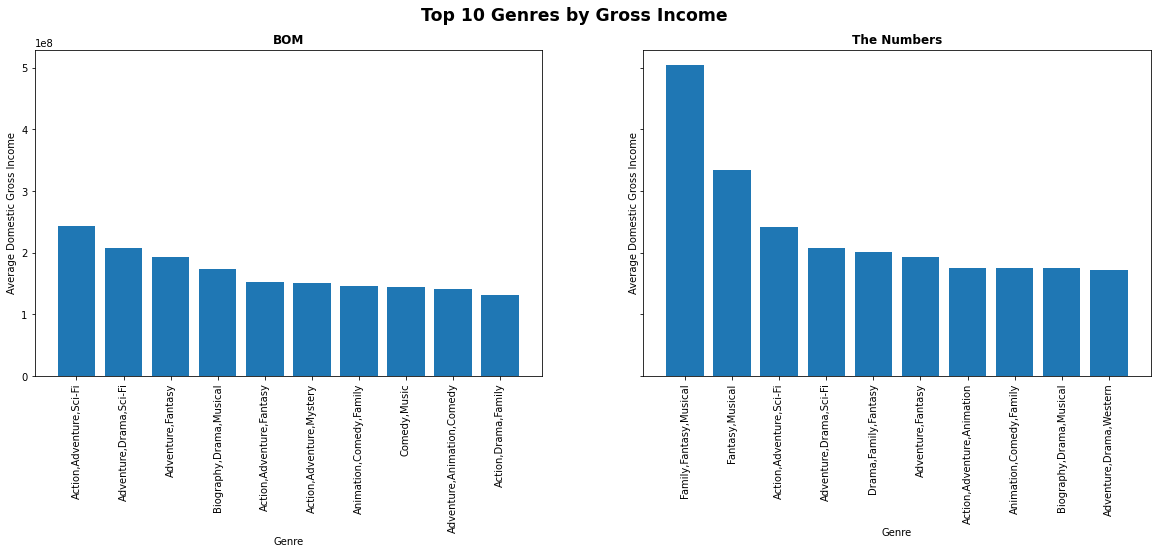

In [88]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6), sharey=True)

x_var = 'genres'

ax[0].bar(top_ten_gross_BOM[x_var], height=top_ten_gross_BOM['domestic_gross'])
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Average Domestic Gross Income')
ax[0].set_title('BOM', fontsize='large', fontweight='bold')

ax[1].bar(top_ten_gross_theNums[x_var], height=top_ten_gross_theNums['domestic_gross_int'])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Average Domestic Gross Income')
ax[1].set_title('The Numbers', fontsize='large', fontweight='bold')

plt.suptitle('Top 10 Genres by Gross Income', fontsize='xx-large', fontweight='heavy')

;

### Analysis Notes

While there are not many exact overlaps of genre categories between the top ten of each dataset, it is notable that Action and Adventure are prevalent in both. It is interesting to see that the average gross income from The Numbers is higher overall; this trend can be attributed to the lack of data from the past five years.  The drastic spike for the `Family, Fantasy, Musical` genre which we do not see at all in the top ten for the BOM data set is also notable. This outlier will need further investigation in a later report.

Overall, we can see that movies that include elements of action and adventure tend to have the highest domestic gross income.

## 2. What genres of movies are the most expensive to make?

While not directly related to the question 'what movies are most successful', it is important to keep in mind the cost in making this product. We will investigate further when looking at net income, but it is useful to keep in mind the most expensive genres of movies to make as well. 

In [89]:
top_ten_budget_theNums

,genres,production_budget_int
0,"Adventure,Fantasy",2.316667e+08
1,"Fantasy,Musical",2.000000e+08
2,"Action,Sci-Fi",1.780000e+08
3,"Action,Adventure,Sci-Fi",1.731615e+08
4,"Family,Fantasy,Musical",1.600000e+08
5,"Action,Adventure,Fantasy",1.498581e+08
6,"Adventure,Family,Fantasy",1.491714e+08
7,"Adventure,Drama,Sci-Fi",1.365000e+08
8,"Action,Adventure,Animation",1.279333e+08
9,"Adventure,Mystery,Sci-Fi",1.250000e+08


''

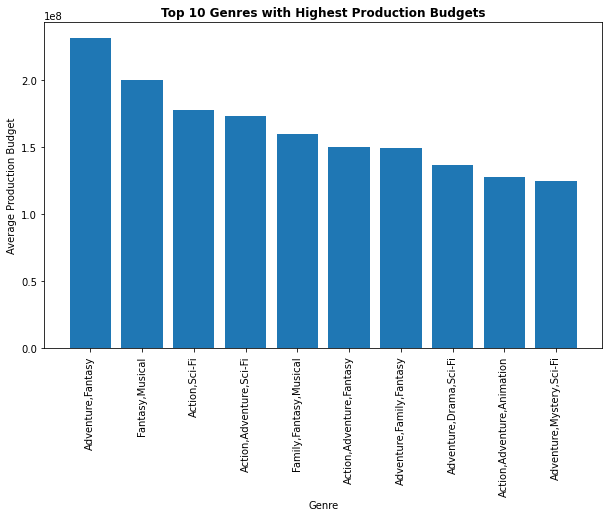

In [90]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(top_ten_budget_theNums['genres'], height=top_ten_budget_theNums['production_budget_int'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Production Budget')
ax.set_title('Top 10 Genres with Highest Production Budgets', fontweight='bold')

;

### Analysis Notes

From above we noted that Action and Adventure movies earned the highest average gross income, however it appears that they also tend to be the most expensive to create, which could be challenging for a new company and could possibly hinder overall net profits. 

## 3. What genres of movies make the most amount of profit?

Based on the data gained from IMDB and The Numbers, we can see the top ten movie genres with the highest average net income. This bottom line profit is a key indicator in what genres of movies would be worthwhile to pursue as a new content creating company. 

In [91]:
top_ten_net_theNums

,genres,production_budget_int,domestic_gross_int,domestic_net
0,"Family,Fantasy,Musical",160000000.0,504014165.0,344014165.0
1,"Adventure,Drama,Western",35000000.0,171243005.0,136243005.0
2,"Fantasy,Musical",200000000.0,334191110.0,134191110.0
3,"Drama,Family,Fantasy",95000000.0,201151353.0,106151353.0
4,"Animation,Comedy,Family",69600000.0,175028795.2,105428795.2
5,"Action,Comedy,Documentary",20000000.0,117229692.0,97229692.0
6,"Biography,Drama,Musical",84000000.0,174340174.0,90340174.0
7,"Comedy,Mystery",40100000.0,127787056.5,87687056.5
8,"Adventure,Drama,Sci-Fi",136500000.0,208225778.5,71725778.5
9,"Action,Mystery,Sci-Fi",34000000.0,102427862.0,68427862.0


''

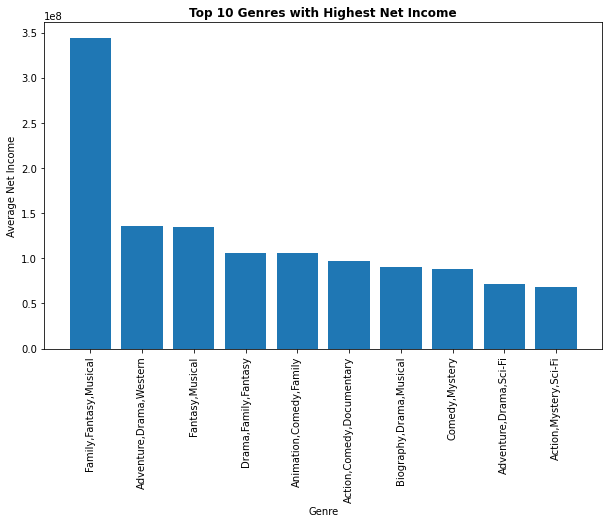

In [92]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(top_ten_net_theNums['genres'], height=top_ten_net_theNums['domestic_net'])
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Net Income')
ax.set_title('Top 10 Genres with Highest Net Income', fontweight='bold')

;

### Analysis Notes

Aside from our outlier, we can see that the other top nine genres are all within the same approximate range of average net income.  We do see Action and Adventure included in these genres which leads to the conclusion that even though they are among the most expensive to create, the payoff could be worth the endeavor. 

The other notable genres are Drama and Comedy. Both were not in the most expensive categories to create (assuming the `Adventure, Drama, Sci-Fi` genre within our top ten most expensive was due to the adventure and science-fiction aspects rather than the drama aspect), and were both present in the top ten highest domestic income charts. 

Overall, the company can pursue (a) `Family, Fantasy, Musical` types of movies in the hopes of competing with the giants in that specific industry, (b) creating action or adventure movies if the starting budgets are ample enough, or (c) starting off with creating movies in the drama or comedy field.  Or of course, assigning teams to each category in an attempt to pursue a combination of the above.

## 4. What genres of movies were the most popular?

We will be utilizing the `ratings_by_genre_df` created earlier from the IMDB data in order to gauge the most popular movies based on rating.  We will also take into account that each genre has a different amount of movies in that category (`num_entries`), as well as varying numbers of total votes. As these variances do skew the average rating for each genre, we will also look at the 'most popular' genre in terms of the genres with the most votes and the most movies in said genre.

In [93]:
top_ten_by_averagerating = ratings_by_genre_df.sort_values(by=['averagerating_of_genre'], ascending=False).head(10)

In [94]:
top_ten_by_averagerating

,genres,averagerating_of_genre,total_num_votes,num_entries
0,"Documentary,Sport",7.500000,114731,318
1,"Biography,Documentary,Drama",7.498674,74907,377
2,"Documentary,Music",7.478756,393048,579
3,"Biography,Documentary,History",7.454071,128555,479
4,"Documentary,History",7.389916,97319,476
5,"Documentary,Drama",7.332818,141267,582
6,Documentary,7.293794,1785513,10313
7,"Biography,Documentary",7.221758,200663,694
8,"Drama,Family",6.651464,253346,478
9,Drama,6.494265,8395521,11612


In [95]:
top_ten_by_votes = ratings_by_genre_df.sort_values(by=['total_num_votes'], ascending=False).head(10)

In [96]:
top_ten_by_entries = ratings_by_genre_df.sort_values(by=['num_entries'], ascending=False).head(10)

''

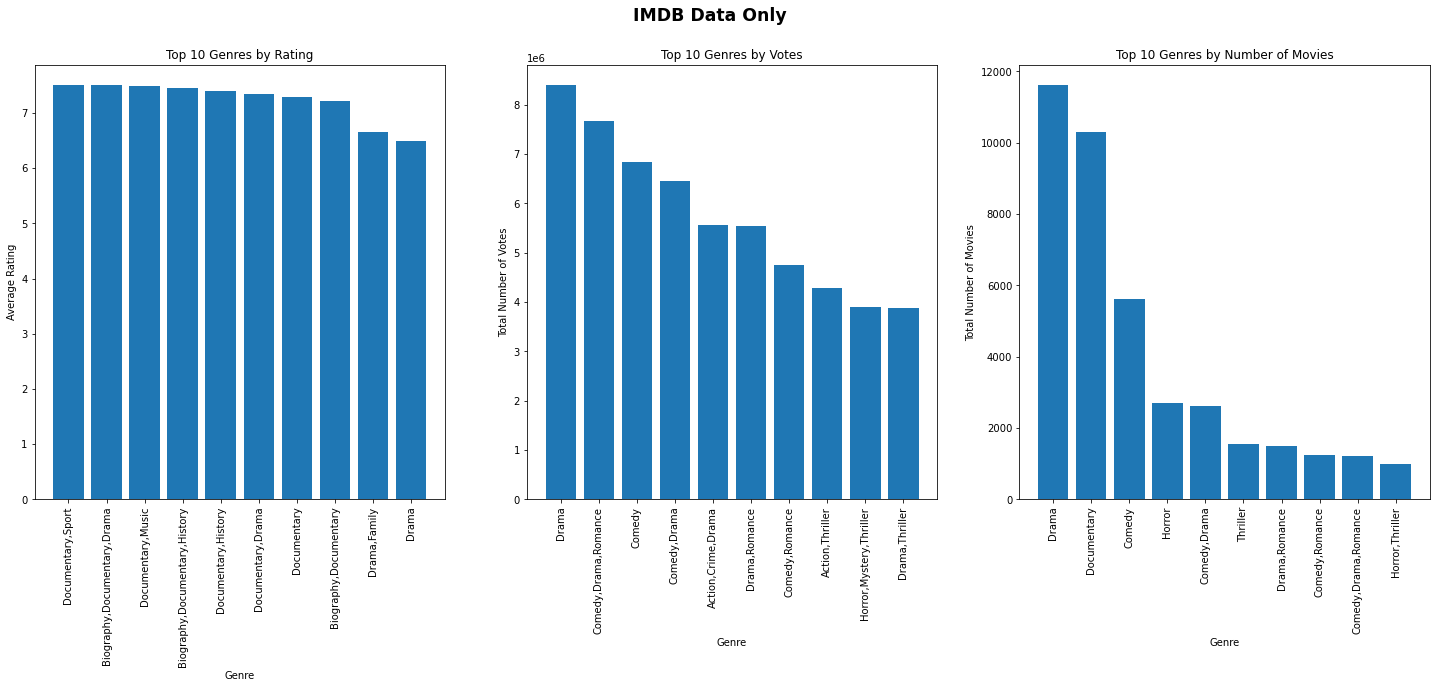

In [97]:
fig, ax = plt.subplots(ncols=3, figsize=(25,8))

x_var = 'genres'

ax[0].bar(top_ten_by_averagerating[x_var], height=top_ten_by_averagerating['averagerating_of_genre'])
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Average Rating')
ax[0].set_title('Top 10 Genres by Rating')

ax[1].bar(top_ten_by_votes[x_var], height=top_ten_by_votes['total_num_votes'])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Total Number of Votes')
ax[1].set_title('Top 10 Genres by Votes')

ax[2].bar(top_ten_by_entries[x_var], height=top_ten_by_entries['num_entries'])
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_xlabel('Genre')
ax[2].set_ylabel('Total Number of Movies')
ax[2].set_title('Top 10 Genres by Number of Movies')

plt.suptitle('IMDB Data Only', fontsize='xx-large', fontweight='heavy')
;

**Above, need to change into top ten instead of top five to be consistent analysis.  Below, need to add in popularity analysis + Graphs from the tmdb data as well.  In final analysis for this section, compare and contrast the results from the two different data sets.**

In [98]:
top_ten_popular

,genres,popularity,vote_average,vote_count
155,"Adventure,Fantasy,Mystery",33.533000,7.700000,10788.000000
478,"Family,Fantasy,Musical",31.793000,6.900000,11023.000000
76,"Action,Fantasy,War",23.680000,6.000000,3870.000000
14,"Action,Adventure,Sci-Fi",19.238205,5.779487,5619.217949
12,"Action,Adventure,Mystery",17.279667,6.266667,5294.000000
9,"Action,Adventure,Fantasy",16.982544,5.571930,3702.087719
75,"Action,Fantasy,Thriller",16.387000,5.050000,1499.000000
15,"Action,Adventure,Thriller",16.384680,5.788000,2770.360000
231,"Biography,Drama,Musical",16.378000,7.266667,3485.666667
147,"Adventure,Family,Fantasy",16.310800,5.925000,3663.800000


In [99]:
top_ten_by_voteaverage

,genres,popularity,vote_average,vote_count
237,"Biography,Family,History",0.918,10.0,1.0
196,"Animation,Short",0.600,10.0,1.0
422,"Drama,Family,War",0.600,10.0,1.0
80,"Action,History,War",3.892,10.0,1.0
379,"Documentary,Fantasy,History",0.600,10.0,1.0
107,"Adventure,Biography",1.001,9.5,4.0
154,"Adventure,Fantasy,Musical",0.878,9.0,1.0
204,"Biography,Comedy,Music",0.661,9.0,2.0
371,"Documentary,Drama,Thriller",0.600,9.0,1.0
223,"Biography,Documentary,War",0.600,9.0,2.0


In [100]:
top_ten_by_votecount

,genres,popularity,vote_average,vote_count,year
14,"Action,Adventure,Sci-Fi",1500.580,450.8,438299,157145
102,"Adventure,Animation,Comedy",1365.176,619.7,229345,199446
9,"Action,Adventure,Fantasy",968.005,317.6,211019,114831
4,"Action,Adventure,Comedy",823.795,421.2,158898,155165
412,Drama,2593.841,6096.5,108956,2066356
461,"Drama,Romance",1175.639,1475.0,100040,495410
244,Comedy,1889.150,3044.9,89167,1166083
272,"Comedy,Drama,Romance",1298.623,1708.3,83806,573951
44,"Action,Crime,Drama",1053.759,790.0,80451,280015
7,"Action,Adventure,Drama",672.362,391.4,79499,147049


''

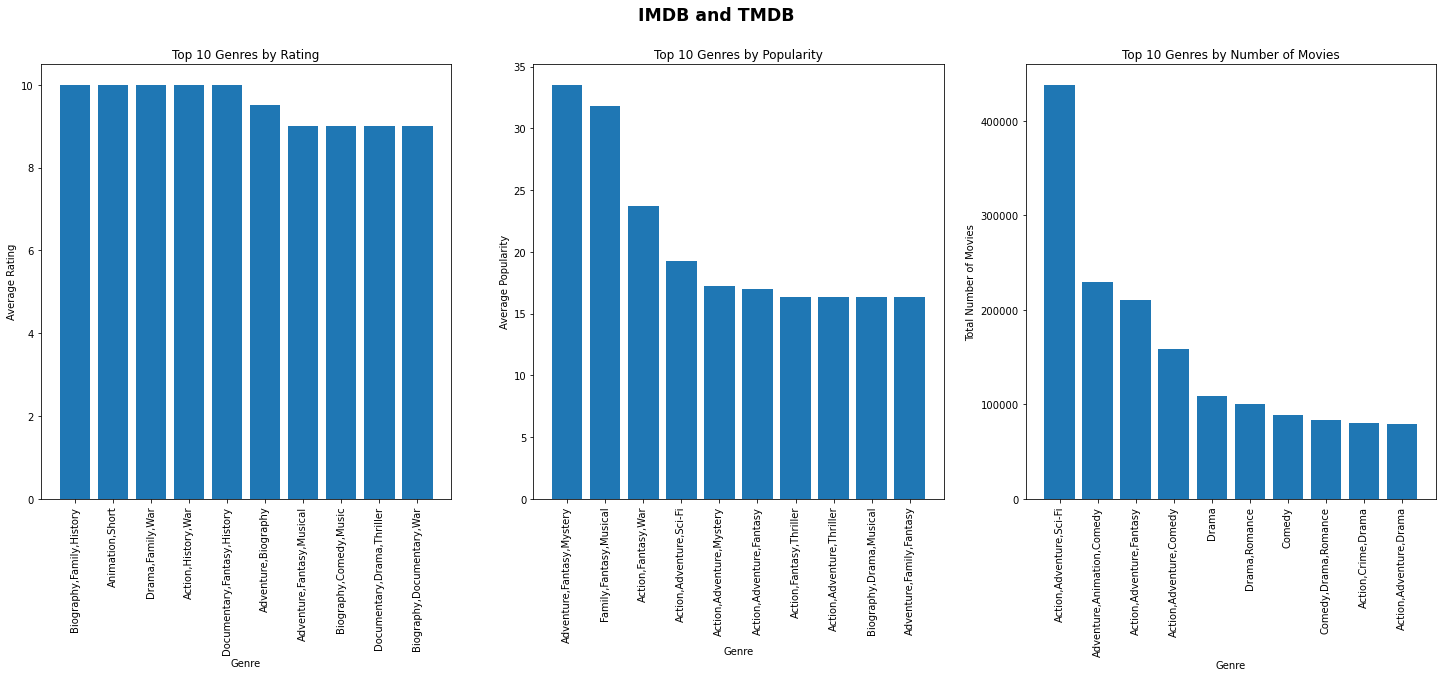

In [101]:
fig, ax = plt.subplots(ncols=3, figsize=(25,8))

x_var = 'genres'

ax[0].bar(top_ten_by_voteaverage[x_var], height=top_ten_by_voteaverage['vote_average'])
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Average Rating')
ax[0].set_title('Top 10 Genres by Rating')

ax[1].bar(top_ten_popular[x_var], height=top_ten_popular['popularity'])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_xlabel('Genre')
ax[1].set_ylabel('Average Popularity')
ax[1].set_title('Top 10 Genres by Popularity')

ax[2].bar(top_ten_by_votecount[x_var], height=top_ten_by_votecount['vote_count'])
ax[2].tick_params(axis='x', labelrotation=90)
ax[2].set_xlabel('Genre')
ax[2].set_ylabel('Total Number of Movies')
ax[2].set_title('Top 10 Genres by Number of Movies')

plt.suptitle('IMDB and TMDB', fontsize='xx-large', fontweight='heavy')
;

### ANALYSIS - NEED TO EDIT (just notes)

- Very little variance in ratings with the top five. 
- From just average ratings, most popular movies tend to be a type of Documentary.  However, we can see that no genre that includes Documentary made it into our top five genres by votes, even though it was the second most common genre of movie made based off our data.  From this, we can deduce that the any type of documentary made, while appealing to a smaller audience of people, will generally be highly rated by this smaller audience.  
- From the graphs we can see the Drama tends to be the most made genre of movie and received the highest amount of votes, which we can translate into success based on a wider audience.  
- Comedy would come directly after Drama in popularity as this genre received quite a bit of attention based on the number of votes, even though the number of entries dropped drastically compared to Drama and Documentary genres.  More people are voting on fewer movies, is a good indicator that a Comedy would be a popular genre of movie to create.

# Conclusions

## NEED TO EDIT

In sum, movies in the Action, Adventure, and Drama genres have been the most successful over the past 20 years.  

# Next Steps :)

Can do further investigation concerning directors and writers to see if there are specifc people would recommend to hire.  Furthermore, analysis concerning all of the above internationally would be pertienent if lookint to expand the business in that direction.  It would also be interesting to see the 'success' of movies (either by genre, director, or writer) over a period of time to see if any release cycles or patterns appear.